In [1]:
import pandas as pd

In [9]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
train = pd.read_csv('/Users/admin/Downloads/archive-3/Train.csv')
test = pd.read_csv('/Users/admin/Downloads/archive-3/Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
# for train
train['Outlet_Size'] = train.Outlet_Size.fillna(train.Outlet_Size.dropna().mode()[0])
train['Item_Weight'] = train.Item_Weight.fillna(train.Item_Weight.mean())

# for test
test['Outlet_Size'] = test.Outlet_Size.fillna(test.Outlet_Size.dropna().mode()[0])
test['Item_Weight'] = test.Item_Weight.fillna(test.Item_Weight.mean())

In [7]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
import seaborn as sns

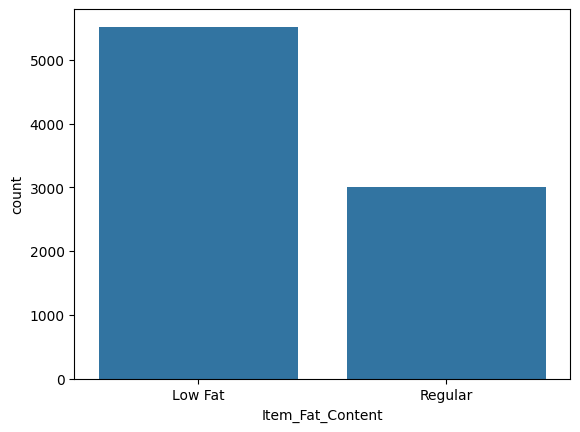

In [11]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

sns.countplot(x=train['Item_Fat_Content']);

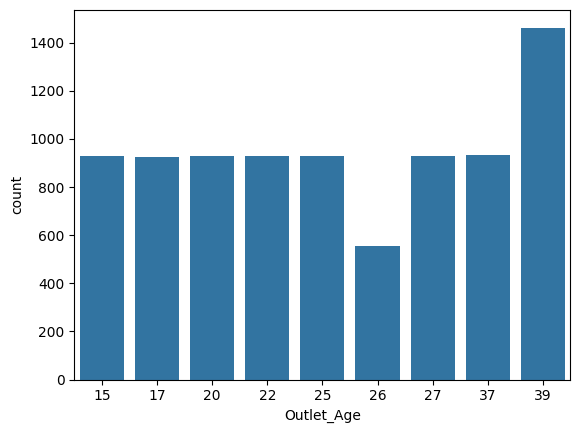

In [12]:
train['Outlet_Age'] = 2024 - train['Outlet_Establishment_Year']
test['Outlet_Age'] = 2024 - test['Outlet_Establishment_Year']

del train['Outlet_Establishment_Year']
del test['Outlet_Establishment_Year']

sns.countplot(x=train['Outlet_Age']);

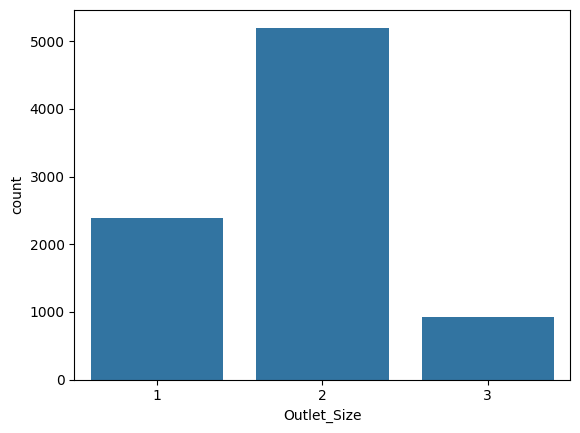

In [13]:
#label encoding
train['Outlet_Size'] = train['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)

test['Outlet_Size'] = test['Outlet_Size'].map({'Small'  : 1,
                                               'Medium' : 2,
                                               'High'   : 3
                                              }).astype(int)

sns.countplot(x=train['Outlet_Size']);

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

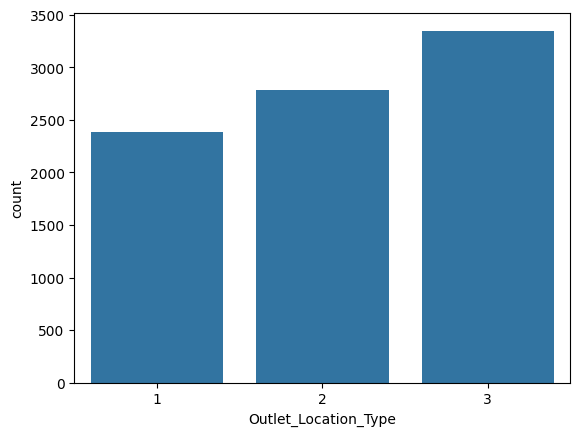

In [14]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].str[-1:].astype(int)
test['Outlet_Location_Type']  = test['Outlet_Location_Type'].str[-1:].astype(int)
sns.countplot(x=train['Outlet_Location_Type'])

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

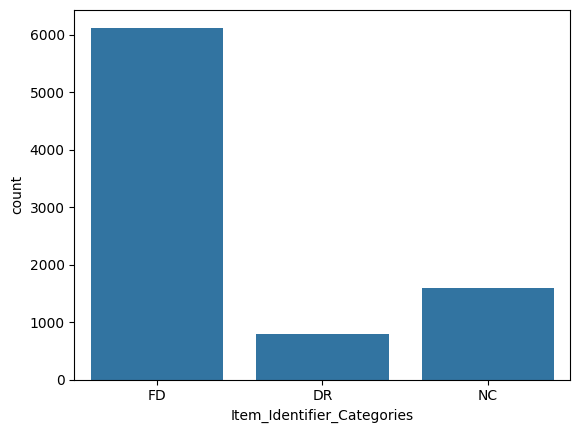

In [15]:
train['Item_Identifier_Categories'] = train['Item_Identifier'].str[0:2] #.astype(int)
test['Item_Identifier_Categories']  = test['Item_Identifier'].str[0:2]

sns.countplot(x=train['Item_Identifier_Categories'])

In [17]:
#Label Encoder for Ordinate Data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ordinal_features = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']

for feature in ordinal_features:
    train[feature] = encoder.fit_transform(train[feature])
    test[feature]  = encoder.fit_transform(test[feature])

train.shape

(8523, 13)

In [18]:
test.shape

(5681, 12)

Onehot encoding

In [19]:
train = pd.get_dummies(train, columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)
test  = pd.get_dummies(test,  columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)

In [20]:
train.drop(labels=['Item_Identifier'], axis=1, inplace=True)
test.drop(labels=['Item_Identifier'],  axis=1, inplace=True)

In [21]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Size                      8523 non-null   int64  
 5   Outlet_Location_Type             8523 non-null   int64  
 6   Outlet_Type                      8523 non-null   int64  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Outlet_Age                       8523 non-null   int64  
 9   Item_Type_Breads                 8523 non-null   bool   
 10  Item_Type_Breakfast              8523 non-null   bool   
 11  Item_Type_Canned                 8523 non-null   bool   
 12  Item_Type_Dairy     

In [34]:
from sklearn.model_selection import train_test_split, cross_validate

from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier

In [42]:
from tqdm import tqdm
models = {"RF": RandomForestRegressor(),
          "GB":GradientBoostingRegressor(),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "ElasticNet": ElasticNet(),
          "KNC":KNeighborsRegressor(),
          "DT":DecisionTreeRegressor(),
         }
for model_name, model in tqdm(models.items(), desc="Model fit", total=len(models)):
    model.fit(X_train, y_train)

Model fit: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]


In [43]:
from sklearn.metrics import r2_score
#r2 score
r2=[]
from sklearn.metrics import r2_score
for model_name, model in models.items():
  pred = model.predict(X_test)
  acc = r2_score(y_test, pred)
  r2.append(acc)
  print(f"{model_name} / Testing r2: {acc}%")

RF / Testing r2: 0.5565880342976459%
GB / Testing r2: 0.5971535659515164%
SVR / Testing r2: 0.16984083366716152%
LR / Testing r2: 0.557981285498222%
ElasticNet / Testing r2: 0.4557364807450557%
KNC / Testing r2: 0.45993913025564503%
DT / Testing r2: 0.13042153590899774%


In [44]:
#r2 score
train_r2=[]
from sklearn.metrics import r2_score
for model_name, model in models.items():
  pred = model.predict(X_train)
  acc = r2_score(y_train, pred)
  train_r2.append(acc)
  print(f"{model_name} / Testing r2: {acc}%")

RF / Testing r2: 0.9383919805901951%
GB / Testing r2: 0.6344505997445427%
SVR / Testing r2: 0.1882293721643994%
LR / Testing r2: 0.5647605301855843%
ElasticNet / Testing r2: 0.47507113148313307%
KNC / Testing r2: 0.6541686878715866%
DT / Testing r2: 1.0%


In [45]:
import numpy as np

In [46]:
x_total = np.concatenate((X_train, X_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

In [47]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
rf = RandomForestRegressor() # Create Model Object
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  RFscores = cross_val_score(rf, x_total, y_total,scoring='r2', cv=kfold)
  print('n_splits={}, RandomForest cross validation score: {}'.format(n, RFscores.mean()))

n_splits=3, RandomForest cross validation score: 0.5570822032519329
n_splits=5, RandomForest cross validation score: 0.5546815739482573


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
gb = GradientBoostingRegressor() # Create Model Object
for n in [3, 5]:
  kfold = KFold(n_splits=n)
  GBscores = cross_val_score(rf, x_total, y_total,scoring='r2', cv=kfold)
  print('n_splits={}, GradientBoosting cross validation score: {}'.format(n, GBscores.mean()))

n_splits=3, GradientBoosting cross validation score: 0.5579448389625669
n_splits=5, GradientBoosting cross validation score: 0.5541659889810998


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(gb, param_grid=params, scoring='r2', cv=3)
grid_gb.fit(x_total, y_total)

print('Optimal Hyperparameters: {0}, Optimal Mean Accuracy: {1:.3f}'.format(grid_gb.best_params_, grid_gb.best_score_))

Optimal Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}, Optimal Mean Accuracy: 0.601


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid=params, scoring='r2', cv=3)
grid_rf.fit(x_total, y_total)
print('Optimal Hyperparameters:', grid_rf.best_params_)
print('Optimal Mean R2 Score:', grid_rf.best_score_)

Optimal Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Optimal Mean R2 Score: 0.5901988063638282
